<a href="https://colab.research.google.com/github/alexandergribenchenko/Acamica_Proyecto_02/blob/main/DS_Proyecto_02_V_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 02 - Ingeniería de features, Modelos avanzados e Interpretación de modelos** (Armado)

### (Acámica - DS online 40 - Proyecto 02 - Alexander Ortega)

# **Alcance y objeto del proyecto:**


El presente proyecto tiene como finalidad exhibir e implementar un conjunto de herramientas analíticas y predictivas propias de problemas del aprendizaje supervisado, más especificamante de problemas de regresión, empleando como contexto específico el estudio de los precios de los inmuebles de la Ciudad de Buenos Aires entre 2019 y enero de 2020, con el fin de generar y evaluar modelos que permitan hacer su predicción. 

##### ---> Librerías a emplear en el proyecto:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### **Etapa Preliminar.** Preparación del dataset de análisis

En la presente etapa,  que dividiremos en  4 pasos, recopilaremos y cargaremos la información primaria para el estudio, exploramos el datset cargado (raw) para entender mejor cada una de las variables y entender con ello qué tipo de procesamiento deberíamos aplicar, eliminaremos los atributos que hayamos encontrado que no sean relevantes para el modelo, y finalmente definiremos el dataset base será el que empleado de manera posterior en la etapa de Transformación de datos.

### **EP. 1.1.** Recopilación y descarga de la información primaria

La información base para el desarrollo del siguiente proyecto fue obtenida de la [página de la división de datos de Properati](https://www.properati.com.co/data/), una plataforma web enfocada en el mercado inmobiliario de 4 países de Latinoamérica: Argentina, Colombia, Perú y Ecuador. En específico en la sección de Datasets del enlace descrito encontramos el enlace de descarga directa  en formato CSV para cada uno de los países.

Para efectos del desarrollo del proyecto generamos únicamente la descarga del dataset de Argentina y tomamos en cuenta únicamente las propiedades publicadas entre 2019 y enero de 2020, ubicadas al interior del Gran Buenos Aires. 
 

### **EP. 1.2.** Exploración del dataset (raw)

Iniciaremos cargando y evaluando la información general del dataset descargado (Argentina, 2019):


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/00_Acamica/DS_Proyecto_01_Datos_Properati.csv'

In [ ]:
df = pd.read_csv(path_data, sep =',')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Corroboramos que el dataset cuenta con los siguientes 19 atributos:

- **start_date:** fecha en formato año-mes-día en que inició la publicación.

- **end_date:** fecha en formato año-mes-día en que finalizó la publicación.

- **created_on:** fecha en formato año-mes-día en que se creó la publicación.

- **lat:** latitud de la ubicación.

- **lon:** longitud de la ubiucación.

- **l1:** país del inmueble.

- **l2:** zona del Gran Buenos Aires donde esta ubicado.

- **l3:** barrio donde esta ubicado.

- **rooms:** cantidad de espacios independientes.

- **bedrooms:** cantidad de habitaciones.

- **bathrooms:** cantidad de baños.

- **surface_total:** superficie total.

- **surface_covered:** superficie construida.

- **price:** precio (este es nuestro target).

- **currency:** moneda en que esta dado el precio.

- **title:** titulo de la publicación.

- **description:** descripción del inmueble.

- **property_type:** tipo de propiedad.

- **operation_type:** tipo de operación.

Exploraremos ahora con mayor detalle cada uno de los atributos para determinar cuáles de ellos nos son útiles, de cuales de ellos debemos prescindir porque no representan información relevante en nuestro contexto y cuáles deben ser transformados de manera inicial para que tengan una representación más limpia y homogénea en el dataset. 

##### **---> Exploración variable start_date, end_date, y created_on:**

In [ ]:
df.start_date = pd.to_datetime(df.start_date)
print(df.start_date.min().date())
print(df.start_date.max().date())
df_temp = df.start_date.value_counts().to_frame().reset_index().sort_values(by=['index']).reset_index(drop=True)
df_temp=df_temp.groupby([pd.Grouper(key= 'index', freq='MS')])\
        .sum().reset_index()
df_temp['index'] = df_temp['index'].apply(lambda x: str(x.date())[0:7])
df_temp.columns=['Mes','Cantidad publicaciones']

2019-01-01
2020-01-25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

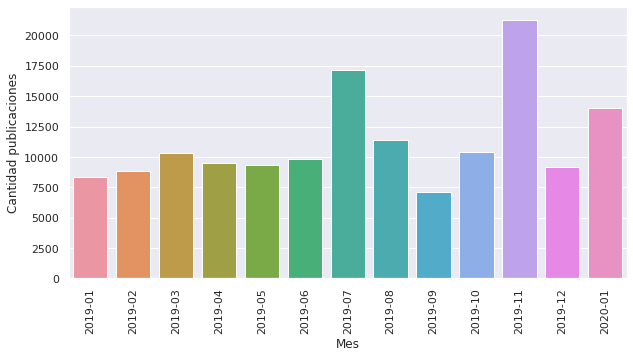

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data=df_temp, x="Mes", y="Cantidad publicaciones")
plt.xticks(rotation=90)

Aunque vemos que hay un comportamiento diferencial entre la cantidad de publicaciones en los diferentes meses del año, no centraremos nuestro estudio en dicho comportamiento. Si bien el precio de los inmuebles puede fluctuar dependiendo de la fecha de publicación, este comportamiento temporal es un comportamiento que se sugeriría estudiar con mayor detalle en el caso que se encuentre relevante para un segmento de inmuebles particular. 

Para nuestro caso específico prescindiremos de las variables asociadas a las fechas y asumiremos que las fechas tanto de inicio, finalización y creación de la publicación, no son relevantes frente a las restantes características de los inmuebles.

**Procesamiento a aplicar:** las variables que serán descartadas en el dataframe de analisis.


##### **---> Exploración variables lat y lon:**

In [ ]:
df[['lat','lon']].describe()

,lat,lon
count,136735.000000,136701.000000
mean,-34.604896,-58.465304
std,0.468428,0.486190
min,-35.318457,-180.000000
25%,-34.627667,-58.504012
50%,-34.600943,-58.443262
75%,-34.574600,-58.407586
max,85.051129,-57.805832


Aunque observamos que la distribución de latitudes y longitudes pueden presentar algunos valores atípicos en sus maximos y minimos, vemos acorde al percentil 75% y a su valor medio, que en general las latitudes y longitudes corresponden con las de la ciudad de buenos aires  (valores esperados próximos a: latitud 34.36 y longitud 58.26). 

Estas variables las tendremos en cuenta pues corresponden con geolocalizaciones, que en conjunto con otras variables de ubicación pueden presentar una influencia significativa en el precio de los inmuebles. 

**Procesamiento a aplicar:** las variables son de tipo numérico continuo. Se evaluarán y descartaran outliers y se escalarán sus datos. Los datos con valores faltantes no se imputarán, pues corresponden con a una ubicación muy específica para cada inmueble que no sería sensato obtener a partir de una imputación.



##### **---> Exploración variables l1, l2 y l3:**

In [ ]:
df.l1.value_counts(dropna=False)

Argentina    146660
Name: l1, dtype: int64

La variable l1 será descartada del total pues todos los inmuebles se encuentran en Argentina por lo cual no agrega valor alguno.

Capital Federal             63.10
Bs.As. G.B.A. Zona Norte    16.56
Bs.As. G.B.A. Zona Sur      11.71
Bs.As. G.B.A. Zona Oeste     8.64
Name: l2, dtype: float64


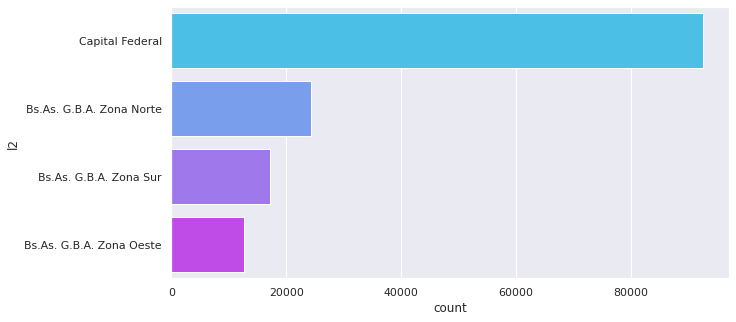

In [ ]:
plt.figure(figsize = (10,5))
print(round(100*df.l2.value_counts(dropna=False, normalize=True),2))
sns.countplot(data = df, y = 'l2', order = df['l2'].value_counts().index, palette='cool')

Dado que acorde a la distribución de la variable l2 la zona más representativa en relación con la cantidad de registros es Capital Federal (63% de los registros), filtraremos nuestro dataset para tener únicamente en cuenta los de esta Zona y así tener resultados comparativos de los modelos con los presentados en el primer proyecto.

Palermo            8.91
Tigre              5.94
Almagro            5.13
Belgrano           4.73
Caballito          4.53
                   ... 
Cañuelas           0.07
Villa Soldati      0.05
Villa Riachuelo    0.03
Marcos Paz         0.02
Catalinas          0.00
Name: l3, Length: 89, dtype: float64


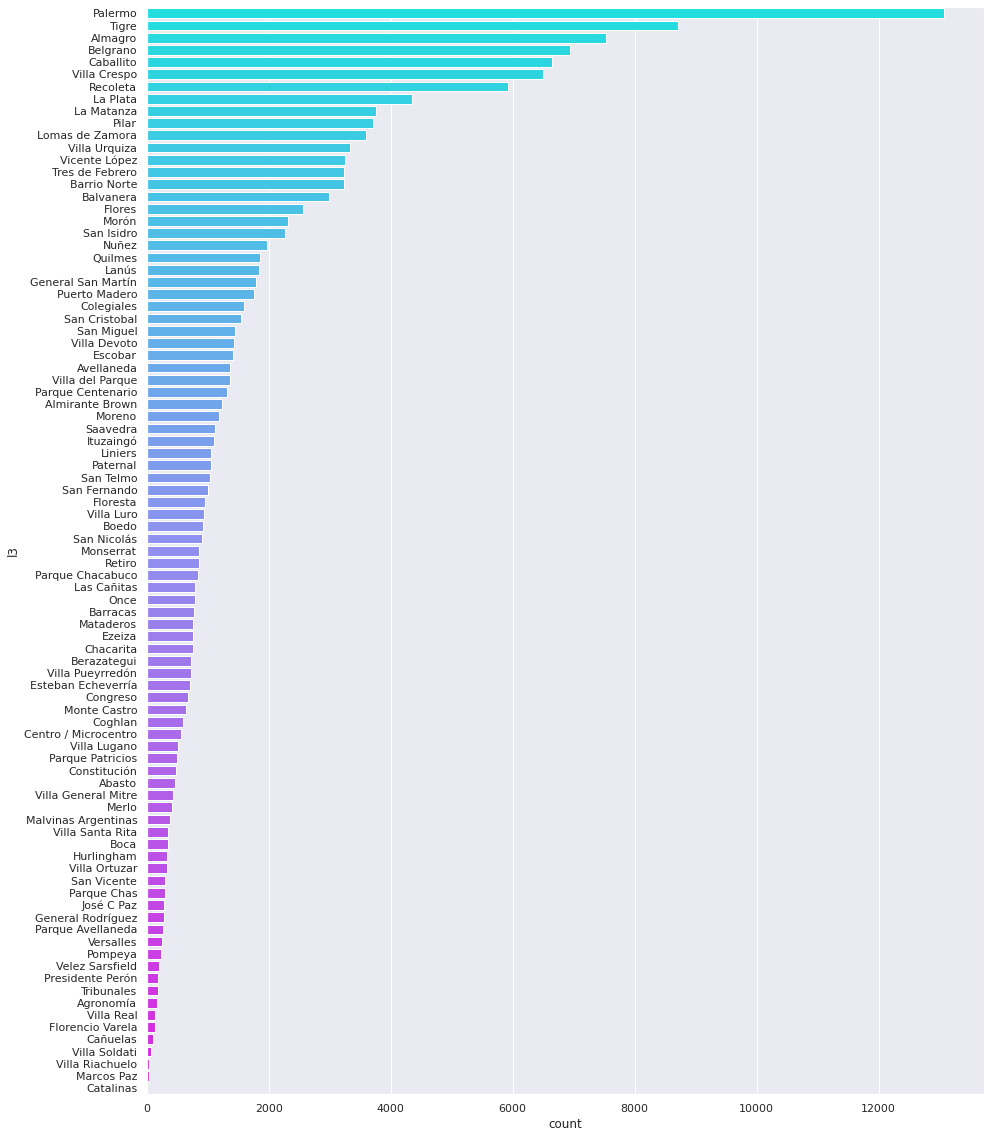

In [ ]:
plt.figure(figsize = (15,20))
print(round(100*df.l3.value_counts(dropna=False, normalize=True),2))
sns.countplot(data = df, y = 'l3', order = df['l3'].value_counts().index, palette='cool')

Aunque respecto a la variable L3 se encuentra una distribución con barrios con cantidades significativas de registros (Palermo, Tigre, Almagro) y otros barrios con cantidades muy pequeñas (Catalinas, Marcos Paz), dejaremos todos los barrios para tener la totalidad de Capital federal para nuestro análisis. Además la localización del inmueble acorde al barrio puede ser una de las propiedades más sensibles para establecer su precio y queremos observar esta influencia en los modelos a evaluar.

**Procesamiento a aplicar:** las variables que son de tipo categórico nominal, por tanto para poder incluirlos en los modelos aplicaremos one hot encoding. Adicional a ello los valores faltantes podrán imputarse a partir de las variables restantes que se consideren de mayor interés (latitud y longitud de manera más específica para esta variable).

##### **---> Exploración variables rooms, bedrooms, bathrooms:**

In [ ]:
df[['rooms','bedrooms', 'bathrooms']].describe()

,rooms,bedrooms,bathrooms
count,146660.000000,146660.000000,140703.000000
mean,3.079817,1.983240,1.599994
std,1.416352,1.151304,0.889324
min,1.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,35.000000,15.000000,14.000000


Acorde a la distribución de las variables encontramos fijándonos en el valor de los percentiles que por lo menos el 75% de las propiedades corresponden a inmuebles que tienen como máximo 4 espacios, 3 habitaciones y 2 baños. Esto corresponde en general con propiedades que seguramente serán del tipo Departamento, Casa o PH. 

Mantendremos todas las variables, pues en conjunto con la ubicación y la superficie pueden ser las variables más relevantes al determinar el precio de los inmuebles.

**Procesamiento a aplicar:** las variables que son de tipo numérico discreto y esto hace que se puedan tener 2 aproximaciones en su transformación. Por una parte al tratarse de variables numéricas podemos establecer outliers respecto a su distribución y podemos normalizarlas, y por otra parte, dado que los grupos en los cuales se distribuyen no son muchas pueden considerarse también como variables categóricas de tipo ordinal con lo cual podría aplicarse label encoding para incluirlas en el modelo. La elección de la bondad de un camino u otro se dará al momento de evaluar los modelos. Adicional a ello los valores faltantes podrán imputarse a partir de las variables restantes que se consideren de mayor interés (quizá superficie, tipo de propiedad y las restantes rooms, bedrooms y bathroms que se conozcan).


##### **---> Exploración variables surface_total  y surface covered:**

In [ ]:
df[['surface_total','surface_covered']].describe()

,surface_total,surface_covered
count,126133.000000,125046.000000
mean,216.872888,112.818011
std,2037.606649,916.857584
min,10.000000,1.000000
25%,52.000000,47.000000
50%,78.000000,68.000000
75%,140.000000,108.000000
max,193549.000000,126062.000000


Acorde a la distribución de las variables encontramos que son quizá las presentan un comportamiento menos homogéneo. Puede observarse como la desviación estándar es muy superior a los valores medios, y como entre los percentiles 75% y los valores máximos, o como entre el percentil 25% y los valores mínimos encontramos grandes brechas.

Dado que el tipo de propiedades que evaluaremos corresponden a propiedades de tipo del tipo Departamento, Casa o PH, en las cuales la mayoría la superficie construido abarca casi la totalidad de la perficie cubierta, eliminaremos la variable de superficie cubierta para que no presenten colinealidad, lo que puede hacer que algunos modelos (como el regresor lineal, por ejemplo) presenten comportamientos anómalos por no lograr discriminar de manera diferenciada el aporte que están teniendo cada una de las dos variables.

Sin embargo la variable que mantendremos, superficie total, será una de las variables más sensible al momento de estimar el precio de los inmuebles.

**Procesamiento a aplicar:** las variables son de tipo numérico continuo por lo cual se generará por un aparte eliminación de outliers y por otra escalado de los datos que acorde a la distribución puede ser de tipo logarítmico (dada la larga cola de la distribución, gran distancia entre el percentil 75 y los valores máximos). Adicional a ello los valores faltantes podrán imputarse a partir de las variables restantes que se consideren de mayor interés (cantidad de rooms, bedroooms y el otro valor de superficie si se conoce).

##### **---> Exploración variable price:**

In [ ]:
df[['price']].describe()

,price
count,1.466600e+05
mean,2.412211e+05
std,3.185195e+05
min,5.500000e+03
25%,1.110000e+05
50%,1.660000e+05
75%,2.650000e+05
max,3.243423e+07


La variable precio presenta un comportamiento similar a la variable superficie en cuanto a las distribuciones de percentiles, mínimos, máximos y desviaciones estándar. Por esta razón presentará un tratamiento similar. Es de resaltar además que esta es nuestra variable objetivo de estudio por lo cual debe mantenerse de manera obligatoria.

**Procesamiento a aplicar:** la variables son de tipo numérico continuo por lo cual se generará por un aparte eliminación de outliers y por otra escalado de los datos que acorde a la distribución puede ser de tipo logarítmico (dada la larga cola de la distribución, gran distancia entre el percentil 75 y los valores máximos). Adicional a ello los valores faltantes podrán imputarse a partir de las variables restantes que se consideren de mayor interés.

##### **---> Exploración variable currency:**

In [ ]:
df.currency.value_counts(dropna=False)

USD    146660
Name: currency, dtype: int64

La variable currency será descartada del total pues todos los inmuebles corresponden a dolares por lo cual no agrega valor alguno.

##### **---> Exploración variables title y description:**

In [ ]:
df.title

0               ***Venta semipiso centro, ideal hostel*****
1          Espectacular PH reciclado en Boedo sin expensas.
2         Depto.tipo casa de 2 ambientes en Venta en Pal...
3         COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...
4         58 entre 1 y 2  Venta de departamento en ph.1 ...
                                ...                        
146655    Departamento en Venta en Barrio Privado Barran...
146656    Venta departamentos tres dormitorios jardín co...
146657    Venta departamento de un ambiente Manzanares C...
146658             Departamento en Venta. Manzanares chico.
146659            Departamento en venta en Manzanares Chico
Name: title, Length: 146660, dtype: object

In [ ]:
df.description

0         DESCRIPCION DE LA PROPIEDAD: Departamento de 1...
1          PH reciclado en Boedo a una cuadra de la plaz...
2         2 ambienets amplio , excelente estado , patio ...
3         HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...
4         58 entre 1 y 2  Venta de departamento en PH. P...
                                ...                        
146655    Departamento de 2 ambientesCocina con alacena ...
146656    Muy buen duplex a estrenar en dos plantas más ...
146657    En los Condominios de Campo Manzanares Chico, ...
146658    Broker: Maria 11Departamento de dos ambientes ...
146659    Departamento en el Barrio Manzanares Chico , e...
Name: description, Length: 146660, dtype: object

Aunque la descripción del inmueble y el titulo del anuncio puedan ser elementos de interés al estudiarse con herramientas de procesamiento de lenguaje natural (NLP), este enfoque excede el alcance que hemos dado al presente proyecto por lo cual será una variable que descartaremos de antemano.

##### **---> Exploración variable property_type:**

Departamento       73.18
Casa               14.67
PH                  9.75
Lote                0.89
Oficina             0.45
Otro                0.26
Local comercial     0.22
Casa de campo       0.22
Depósito            0.18
Cochera             0.18
Name: property_type, dtype: float64


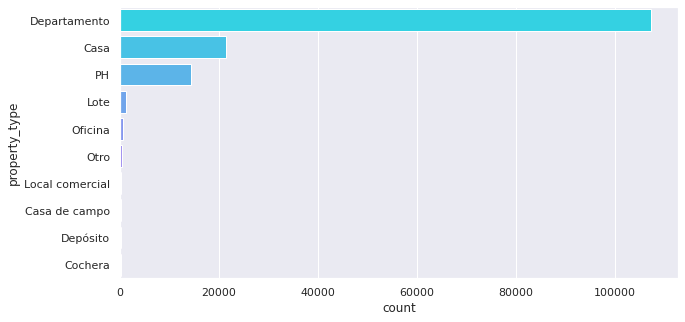

In [ ]:
plt.figure(figsize = (10,5))
print(round(100*df.property_type.value_counts(dropna=False, normalize=True),2))
sns.countplot(data = df, y = 'property_type', order = df['property_type'].value_counts().index, palette='cool')

Dado que acorde a la distribución de la variable tipo de inmueble las  categorías más representativas son Departamento, Casa y PH (en conjunto representan más del 90% de las propiedades), filtraremos nuestro dataset para tener únicamente en cuenta estas 3 categorías y así tener información comparativa de los modelos con los presentados en el primer proyecto. 

**Procesamiento a aplicar:** la variable es de tipo categórico nominal, por tanto para poder incluirla en los modelos aplicaremos one hot encoding. Adicional a ello los valores faltantes podrán imputarse a partir de las variables restantes que se consideren de mayor interés (superficie y cantidad de baños, espacios y habitaciones).

### **EP. 1.3.** Eliminación de variables y filtrado de categorias de interes.

##### **---> Eliminación de variables:**

Acorde a lo discutido en el numeral anterior, descartamos del total 3 tipos de variables que no resultan útiles para nuestro caso de estudio: variables que presentan atributos asociados a fechas, variables que presenta un único valor y variables con textos descriptivos. Estas variables las eliminamos en esta sección de manera definitiva.

In [ ]:
# Atributos asociados a fechas
list_descartar_dates= ['start_date','end_date','created_on']
# Atributos con un único valor
list_descartar_uni_val= ['l1','operation_type','currency']
# Atributo con texto descriptivo
list_descartar_text_vdesc= ['title','description']
# Totalidad de los atributos a descartar
list_descartar = list_descartar_dates + list_descartar_uni_val + list_descartar_text_vdesc

In [ ]:
# Reescribimos el dataframe con los valores ya filtrados
df= df.drop(list_descartar,axis=1)
df

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


In [ ]:
#### Variables con colinelidad?

##### **---> Filtrado de categorías de interes:**

In [ ]:
df=df[(df_properati.l2 == 'Capital Federal')
df=df[df_properati.property_type.isin(['Departamento','Casa','PH']))
